In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import requests
import os
from matplotlib import cycler #Modificación de los valores estándar del aspecto de las gráficas.
from mpl_toolkits import mplot3d #Librería para gráficas 3D.
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [2]:
path = '/home/Análisis_de_datos/'
Tmax_2018 = pd.read_csv(path + '201801010000TMax.csv', encoding = 'latin-1')
Tmax_2019 = pd.read_csv(path + '201901010000TMax.csv', encoding = 'latin-1')
Tmed_2018 = pd.read_csv(path + '201801010000TMed.csv', encoding = 'latin-1')
Tmed_2019 = pd.read_csv(path + '201901010000TMed.csv', encoding = 'latin-1')
Tmin_2018 = pd.read_csv(path + '201801010000TMin.csv', encoding = 'latin-1')
Tmin_2019 = pd.read_csv(path + '201901010000TMin.csv', encoding = 'latin-1')

path = '/home/Análisis_de_datos1'
Lluv_18en = pd.read_csv(path + '201801010000Lluv.csv', encoding = 'latin-1')
Lluv_18fe = pd.read_csv(path + '201802010000Lluv.csv', encoding = 'latin-1')
Lluv_18mr = pd.read_csv(path + '201803010000Lluv.csv', encoding = 'latin-1')
Lluv_18ab = pd.read_csv(path + '201804010000Lluv.csv', encoding = 'latin-1')
Lluv_18ma = pd.read_csv(path + '201805010000Lluv.csv', encoding = 'latin-1')
Lluv_18jn = pd.read_csv(path + '201806010000Lluv.csv', encoding = 'latin-1')
Lluv_18jl = pd.read_csv(path + '201807010000Lluv.csv', encoding = 'latin-1')
Lluv_18ag = pd.read_csv(path + '201808010000Lluv.csv', encoding = 'latin-1')
Lluv_18se = pd.read_csv(path + '201809010000Lluv.csv', encoding = 'latin-1')
Lluv_19en = pd.read_csv(path + '201901010000Lluv.csv', encoding = 'latin-1')
Lluv_19fe = pd.read_csv(path + '201902010000Lluv.csv', encoding = 'latin-1')
Lluv_19mr = pd.read_csv(path + '201903010000Lluv.csv', encoding = 'latin-1')
Lluv_19ab = pd.read_csv(path + '201904010000Lluv.csv', encoding = 'latin-1')
Lluv_19ma = pd.read_csv(path + '201905010000Lluv.csv', encoding = 'latin-1')
Lluv_19jn = pd.read_csv(path + '201906010000Lluv.csv', encoding = 'latin-1')
Lluv_19jl = pd.read_csv(path + '201907010000Lluv.csv', encoding = 'latin-1')
Lluv_19ag = pd.read_csv(path + '201908010000Lluv.csv', encoding = 'latin-1')
Lluv_19se = pd.read_csv(path + '201909010000Lluv.csv', encoding = 'latin-1')

In [3]:
print(Tmax_2019.keys())
#Tienen los mismos nombres de columnas, por lo que es posible compararlos.
print(Tmax_2019.keys() == Tmax_2018.keys(), Tmed_2019.keys() == Tmed_2018.keys(), 
      Tmin_2019.keys() == Tmin_2018.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')
[ True  True  True  True  True  True] [ True  True  True  True  True  True] [ True  True  True  True  True  True]


## <strong>Distribución de temperaturas:</strong>

<strong>1. Promedio, desviaciones estándar, media, moda de la distribución, rango interquartil de la distribución.</strong>

Promedio de la temperatura máxima, media y mínima para 2018, 2019 respectivamente:

#### 2018:

In [4]:
T2018 = pd.DataFrame({'Año' : [2018, 2018, 2018],
                      'Temperatura' : ['Máxima', 'Media', 'Mínima'],
                      'Media' : [Tmax_2018['Tmax'].mean(), Tmed_2018['Tmed'].mean(), Tmin_2018['Tmin'].mean()],
                      '$\sigma$' : [Tmax_2018['Tmax'].std(), Tmed_2018['Tmed'].std(), Tmin_2018['Tmin'].std()],
                      'Mediana' : [Tmax_2018['Tmax'].median(), Tmed_2018['Tmed'].median(), Tmin_2018['Tmin'].median()],
                      'Moda' : [Tmax_2018['Tmax'].mode(), Tmed_2018['Tmed'].mode(), Tmin_2018['Tmin'].mode()],
                      'Mínima' : [Tmax_2018['Tmax'].min(), Tmed_2018['Tmed'].min(), Tmin_2018['Tmin'].min()],
                      'Máxima' : [Tmax_2018['Tmax'].max(), Tmed_2018['Tmed'].max(), Tmin_2018['Tmin'].max()],
                      '25%' : [Tmax_2018['Tmax'].quantile(.25), Tmed_2018['Tmed'].quantile(.25), Tmin_2018['Tmin'].quantile(.25)],
                      '50%' : [Tmax_2018['Tmax'].quantile(.50), Tmed_2018['Tmed'].quantile(.50), Tmin_2018['Tmin'].quantile(.50)],
                      '75%' : [Tmax_2018['Tmax'].quantile(.75), Tmed_2018['Tmed'].quantile(.75), Tmin_2018['Tmin'].quantile(.75)]})
T2018

,Año,Temperatura,Media,$\sigma$,Mediana,Moda,Mínima,Máxima,25%,50%,75%
0,2018,Máxima,24.383076,4.606409,24.0,0 24.1 dtype: float64,6.6,36.3,21.00,24.0,27.50
1,2018,Media,16.379527,4.960928,15.8,0 12.6 dtype: float64,3.2,28.5,12.55,15.8,20.60
2,2018,Mínima,8.372247,6.170696,7.5,0 4.8 1 5.4 2 5.6 3 7.2 dtype: flo...,-10.6,23.3,3.85,7.5,12.75


#### 2019:

In [5]:
T2019 = pd.DataFrame({'Año' : [2019, 2019, 2019],
                      'Temperatura' : ['Máxima', 'Media', 'Mínima'],
                      'Media' : [Tmax_2019['Tmax'].mean(), Tmed_2019['Tmed'].mean(), Tmin_2019['Tmin'].mean()],
                      '$\sigma$' : [Tmax_2019['Tmax'].std(), Tmed_2019['Tmed'].std(), Tmin_2019['Tmin'].std()],
                      'Mediana' : [Tmax_2019['Tmax'].median(), Tmed_2019['Tmed'].median(), Tmin_2019['Tmin'].median()],
                      'Moda' : [Tmax_2019['Tmax'].mode(), Tmed_2019['Tmed'].mode(), Tmin_2019['Tmin'].mode()],
                      'Mínima' : [Tmax_2019['Tmax'].min(), Tmed_2019['Tmed'].min(), Tmin_2019['Tmin'].min()],
                      'Máxima' : [Tmax_2019['Tmax'].max(), Tmed_2019['Tmed'].max(), Tmin_2019['Tmin'].max()],
                      '25%' : [Tmax_2019['Tmax'].quantile(.25), Tmed_2019['Tmed'].quantile(.25), Tmin_2019['Tmin'].quantile(.25)],
                      '50%' : [Tmax_2019['Tmax'].quantile(.50), Tmed_2019['Tmed'].quantile(.50), Tmin_2019['Tmin'].quantile(.50)],
                      '75%' : [Tmax_2019['Tmax'].quantile(.75), Tmed_2019['Tmed'].quantile(.75), Tmin_2019['Tmin'].quantile(.75)]})
T2019

,Año,Temperatura,Media,$\sigma$,Mediana,Moda,Mínima,Máxima,25%,50%,75%
0,2019,Máxima,24.992289,4.434152,24.657766,0 22.0 dtype: float64,13.064516,39.870968,21.838710,24.657766,27.931452
1,2019,Media,17.444502,4.738147,16.516129,0 15.387097 1 22.435484 dtype: float64,2.951613,29.800000,13.937570,16.516129,21.467742
2,2019,Mínima,9.812221,5.941190,8.937345,0 7.387097 dtype: float64,-7.161290,22.770968,5.350806,8.937345,15.128017


In [6]:
Union = pd.concat([T2018, T2019])
Union

,Año,Temperatura,Media,$\sigma$,Mediana,Moda,Mínima,Máxima,25%,50%,75%
0,2018,Máxima,24.383076,4.606409,24.000000,0 24.1 dtype: float64,6.600000,36.300000,21.000000,24.000000,27.500000
1,2018,Media,16.379527,4.960928,15.800000,0 12.6 dtype: float64,3.200000,28.500000,12.550000,15.800000,20.600000
2,2018,Mínima,8.372247,6.170696,7.500000,0 4.8 1 5.4 2 5.6 3 7.2 dtype: flo...,-10.600000,23.300000,3.850000,7.500000,12.750000
0,2019,Máxima,24.992289,4.434152,24.657766,0 22.0 dtype: float64,13.064516,39.870968,21.838710,24.657766,27.931452
1,2019,Media,17.444502,4.738147,16.516129,0 15.387097 1 22.435484 dtype: float64,2.951613,29.800000,13.937570,16.516129,21.467742
2,2019,Mínima,9.812221,5.941190,8.937345,0 7.387097 dtype: float64,-7.161290,22.770968,5.350806,8.937345,15.128017


Ahora determinando lo mismo pero sin considerar el año:

In [7]:
Tmax_u = Tmax_2018.append(Tmax_2019)
Tmed_u = Tmed_2018.append(Tmed_2019)
Tmin_u = Tmin_2018.append(Tmin_2019)

T_u = pd.DataFrame({'Temperatura' : ['Máxima', 'Media', 'Mínima'],
                      'Media' : [Tmax_u['Tmax'].mean(), Tmed_u['Tmed'].mean(), Tmin_u['Tmin'].mean()],
                      '$\sigma$' : [Tmax_u['Tmax'].std(), Tmed_u['Tmed'].std(), Tmin_u['Tmin'].std()],
                      'Mediana' : [Tmax_u['Tmax'].median(), Tmed_u['Tmed'].median(), Tmin_u['Tmin'].median()],
                      'Moda' : [Tmax_u['Tmax'].mode(), Tmed_u['Tmed'].mode(), Tmin_u['Tmin'].mode()],
                      '25%' : [Tmax_u['Tmax'].quantile(.25), Tmed_u['Tmed'].quantile(.25), Tmin_u['Tmin'].quantile(.25)],
                      '50%' : [Tmax_u['Tmax'].quantile(.50), Tmed_u['Tmed'].quantile(.50), Tmin_u['Tmin'].quantile(.50)],
                      '75%' : [Tmax_u['Tmax'].quantile(.75), Tmed_u['Tmed'].quantile(.75), Tmin_u['Tmin'].quantile(.75)]})
T_u

,Temperatura,Media,$\sigma$,Mediana,Moda,25%,50%,75%
0,Máxima,24.624620,4.547447,24.200000,0 24.1 dtype: float64,21.4,24.200000,27.6
1,Media,16.769526,4.906068,16.068548,0 12.6 dtype: float64,13.0,16.068548,20.8
2,Mínima,8.912544,6.123740,8.000000,0 2.5 1 4.8 2 5.4 3 5.6 4 7.2 d...,4.3,8.000000,13.9


<strong>2. Diferencia entre las temperatura mínima en 2018, 2019, entre la temperatura media en 2018, 2019 y entre la temperatura máxima en 2018, 2019.</strong>

In [8]:
Diferencia_T = pd.DataFrame({'Temperatura' : ['Máxima', 'Media', 'Mínima'],
                           '$\mu_{2018}$ $(°C)$' : T2018['Media'],
                           '$\mu_{2019}$ $(°C)$' : T2019['Media'],
                           '$\delta \mu$ $(°C)$' : T2019['Media'] - T2018['Media']})
Diferencia_T

,Temperatura,$\mu_{2018}$ $(°C)$,$\mu_{2019}$ $(°C)$,$\delta \mu$ $(°C)$
0,Máxima,24.383076,24.992289,0.609213
1,Media,16.379527,17.444502,1.064975
2,Mínima,8.372247,9.812221,1.439973


## <strong>Distribución de precipitaciones:</strong>

<strong>1. Diferencia de la precipitación media entre 2018 y 2019.</strong>

In [9]:
lluvias_2018 = pd.DataFrame(Lluv_18en)
lluvias_2018['FEB'] = Lluv_18fe['FEB']
lluvias_2018['MAR'] = Lluv_18mr['MAR']
lluvias_2018['ABR'] = Lluv_18ab['ABR']
lluvias_2018['MAY'] = Lluv_18ma['MAY']
lluvias_2018['JUN'] = Lluv_18jn['JUN']
lluvias_2018['JUL'] = Lluv_18jl['JUL']
lluvias_2018['AGO'] = Lluv_18ag['AGO']
lluvias_2018['SEP'] = Lluv_18se['SEP']

lluvias_2019 = pd.DataFrame(Lluv_19en)
lluvias_2019['FEB'] = Lluv_19fe['FEB']
lluvias_2019['MAR'] = Lluv_19mr['MAR']
lluvias_2019['ABR'] = Lluv_19ab['ABR']
lluvias_2019['MAY'] = Lluv_19ma['MAY']
lluvias_2019['JUN'] = Lluv_19jn['JUN']
lluvias_2019['JUL'] = Lluv_19jl['JUL']
lluvias_2019['AGO'] = Lluv_19ag['AGO']
lluvias_2019['SEP'] = Lluv_19se['SEP']

In [11]:
lluvias_2018.head()

,LON,LAT,ESTADO,CLAVE_SIH,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",25.8,28.7,0.0,0.0,75.4,112.50,34.5,128.2,111.43
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",58.6,24.4,0.0,2.6,34.8,191.20,28.8,63.4,67.20
2,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",56.0,19.5,0.0,5.3,15.4,201.50,108.0,113.0,130.07
3,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",50.0,30.0,0.0,0.0,39.0,250.00,110.5,78.3,178.20
4,-102.197222,22.007222,AGS,CHOAG,"Cañada Honda, Ags.",17.2,33.0,0.0,10.5,46.1,289.11,64.4,80.4,190.74


In [12]:
lluvias_2019.head()

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",6.61,0.0,0.01,0.0,2.12,44.19,148.5,171.35,14.40
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",10.60,0.0,0.40,0.0,4.20,33.00,18.3,113.90,54.97
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",10.50,0.0,0.00,0.0,0.00,101.27,139.0,105.47,128.00
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",18.17,0.0,0.00,0.0,5.32,35.00,100.4,156.30,52.40
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70,0.0,2.31,0.0,0.00,70.22,39.3,126.80,59.01


In [13]:
mes = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP']

Diferencia = pd.DataFrame({'Lluvias' : ['$\mu_{2018}$', '$\mu_{2019}$', 'Diferencia'],
                          'ENE' : [lluvias_2018['ENE'].mean(), lluvias_2019['ENE'].mean(), lluvias_2019['ENE'].mean() - lluvias_2018['ENE'].mean()],
                          'FEB' : [lluvias_2018['FEB'].mean(), lluvias_2019['FEB'].mean(), lluvias_2019['FEB'].mean() - lluvias_2018['FEB'].mean()],
                          'MAR' : [lluvias_2018['MAR'].mean(), lluvias_2019['MAR'].mean(), lluvias_2019['MAR'].mean() - lluvias_2018['MAR'].mean()],
                          'ABR' : [lluvias_2018['ABR'].mean(), lluvias_2019['ABR'].mean(), lluvias_2019['ABR'].mean() - lluvias_2018['ABR'].mean()],
                          'MAY' : [lluvias_2018['MAY'].mean(), lluvias_2019['MAY'].mean(), lluvias_2019['MAY'].mean() - lluvias_2018['MAY'].mean()],
                          'JUN' : [lluvias_2018['JUN'].mean(), lluvias_2019['JUN'].mean(), lluvias_2019['JUN'].mean() - lluvias_2018['JUN'].mean()],
                          'JUL' : [lluvias_2018['JUL'].mean(), lluvias_2019['JUL'].mean(), lluvias_2019['JUL'].mean() - lluvias_2018['JUL'].mean()],
                          'AGO' : [lluvias_2018['AGO'].mean(), lluvias_2019['AGO'].mean(), lluvias_2019['AGO'].mean() - lluvias_2018['AGO'].mean()],
                          'SEP' : [lluvias_2018['SEP'].mean(), lluvias_2019['SEP'].mean(), lluvias_2019['SEP'].mean() - lluvias_2018['SEP'].mean()]})
Diferencia

,Lluvias,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP
0,$\mu_{2018}$,30.687049,18.067523,17.483477,45.851360,49.889928,161.805983,88.382789,166.299034,181.601563
1,$\mu_{2019}$,19.300725,12.180226,16.870419,6.815242,39.524881,119.144214,123.067043,128.486780,148.448894
2,Diferencia,-11.386324,-5.887297,-0.613058,-39.036117,-10.365047,-42.661769,34.684253,-37.812254,-33.152668


Es decir, hubo menores lluvias en 2019 que en 2018.

<strong>2. Estado con mayor precipitación en base a los datos proporcionados.</strong>

<strong>3. ¿Cuáles son los estados con la precipitación más baja en determinado mes/año?</strong>

<strong>4. ¿Cuáles son los estados con la precipitación más alta en determinado mes/año?</strong>

In [14]:
lluvias_2018 = lluvias_2018.rename(columns = {"ESTADO" : "EDO"})
lluvias_2018.keys(), lluvias_2019.keys()

(Index(['LON', 'LAT', 'EDO', 'CLAVE_SIH', 'NOMBRE', 'ENE', 'FEB', 'MAR', 'ABR',
        'MAY', 'JUN', 'JUL', 'AGO', 'SEP'],
       dtype='object'),
 Index(['LON', 'LAT', 'EDO', 'CLAVE_SIH', 'NOMBRE', 'ENE', 'FEB', 'MAR', 'ABR',
        'MAY', 'JUN', 'JUL', 'AGO', 'SEP'],
       dtype='object'))

In [15]:
lluvias_2018.loc[:, 'ENE' : 'SEP'].mean()

ENE     30.687049
FEB     18.067523
MAR     17.483477
ABR     45.851360
MAY     49.889928
JUN    161.805983
JUL     88.382789
AGO    166.299034
SEP    181.601563
dtype: float64

A continuación se muestra la manera en como se determina la media para cada <strong>estado</strong> en precipitaciones, y después, para las columnas que están en el intervalo ['ENE', 'SEP'] se realiza la suma de precipitaciones, de igual forma para cada estado.

El próximo paso es observar cuál es el estado con mayor, menor precipitación.

## <strong>Por año:</strong>

### <strong>2018</strong>

In [16]:
mayor = lluvias_2018.groupby('EDO').mean().loc[:, 'ENE' : 'SEP'].T.sum()
mayor.head()

EDO
AGS     545.025566
BC      207.542653
BCS     478.885737
CAMP    852.434399
CHIH    558.007526
dtype: float64

<strong>Estado con mayor precipitación</strong>

In [17]:
maximo = np.where(mayor == np.max(mayor))
mayor.keys()[maximo]

Index(['CHIS'], dtype='object', name='EDO')

Por tanto, para el 2018, el estado con mayor precipitación es <strong>Chiapas</strong>.

In [18]:
mayor = lluvias_2018.groupby('EDO').mean().loc[:, 'ENE' : 'SEP'].T.sum()
mayor.head()

EDO
AGS     545.025566
BC      207.542653
BCS     478.885737
CAMP    852.434399
CHIH    558.007526
dtype: float64

<strong>Estado con menor precipitación</strong>

In [19]:
minimo = np.where(mayor == np.min(mayor))
mayor.keys()[minimo]

Index(['BC'], dtype='object', name='EDO')

Por tanto, para el 2018, el estado con menor precipitación es <strong>Baja California</strong>.

### <strong>2019</strong>

In [20]:
mayor_19 = lluvias_2019.groupby('EDO').mean().loc[:, 'ENE' : 'SEP'].T.sum()
mayor_19.head()

EDO
AGS     315.390435
BC       75.685000
BCS     194.598000
CAMP    916.480000
CHIH    360.474545
dtype: float64

<strong>Estado con mayor precipitación</strong>

In [21]:
maximo = np.where(mayor_19 == np.max(mayor_19))
mayor_19.keys()[maximo]

Index(['CHIS'], dtype='object', name='EDO')

Por tanto, el estado con más precipitaciones es <strong>Chiapas</strong>.

<strong>Estado con menor precipitación</strong>

In [22]:
minimo = np.where(mayor_19 == np.min(mayor_19))
mayor_19.keys()[minimo]

Index(['BC'], dtype='object', name='EDO')

Por tanto, el estado con menos precipitaciones es <strong>Baja California</strong>.

## <strong>Por mes:</strong>

<strong>Estados con precipitación máxima</strong>

In [29]:
meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP']
edo_18, edo_19, mes_18, mes_19 = [], [], [], []

for i in range(len(meses)):
    aux = lluvias_2018.groupby('EDO').mean().loc[:, meses[i]]
    mes_18.append(np.max(aux))
    edo_18.append(aux.keys()[np.where(aux == np.max(aux))])

for i in range(len(meses)):
    aux = lluvias_2019.groupby('EDO').mean().loc[:, meses[i]]
    mes_19.append(np.max(aux))
    edo_19.append(aux.keys()[np.where(aux == np.max(aux))])
    
xm_max = pd.DataFrame({'MES' : meses, 'EDO 2018' : edo_18, 'MÁXIMO 2018' : mes_18, 'EDO 2019' : edo_19, 'MÁXIMO 2019' : mes_19})
xm_max

,MES,EDO 2018,MÁXIMO 2018,EDO 2019,MÁXIMO 2019
0,ENE,"Index(['TAB'], dtype='object', name='EDO')",304.619231,"Index(['TAB'], dtype='object', name='EDO')",132.253182
1,FEB,"Index(['SIN'], dtype='object', name='EDO')",39.403922,"Index(['TAB'], dtype='object', name='EDO')",62.441818
2,MAR,"Index(['SON'], dtype='object', name='EDO')",51.395000,"Index(['NL'], dtype='object', name='EDO')",54.804000
3,ABR,"Index(['TAB'], dtype='object', name='EDO')",108.221739,"Index(['TLAX'], dtype='object', name='EDO')",30.590000
4,MAY,"Index(['CHIS'], dtype='object', name='EDO')",119.727103,"Index(['CHIS'], dtype='object', name='EDO')",203.600845
5,JUN,"Index(['NAY'], dtype='object', name='EDO')",300.737143,"Index(['CHIS'], dtype='object', name='EDO')",272.508451
6,JUL,"Index(['TLAX'], dtype='object', name='EDO')",136.800000,"Index(['MEX'], dtype='object', name='EDO')",176.478333
7,AGO,"Index(['SIN'], dtype='object', name='EDO')",266.619231,"Index(['COL'], dtype='object', name='EDO')",237.771579
8,SEP,"Index(['CHIS'], dtype='object', name='EDO')",274.009310,"Index(['CHIS'], dtype='object', name='EDO')",279.963521


<strong>Estados con precipitación mínima</strong>

In [27]:
meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP']
edo_18, edo_19, mes_18, mes_19 = [], [], [], []

for i in range(len(meses)):
    aux = lluvias_2018.groupby('EDO').mean().loc[:, meses[i]]
    mes_18.append(np.min(aux))
    edo_18.append(aux.keys()[np.where(aux == np.min(aux))])

for i in range(len(meses)):
    aux = lluvias_2019.groupby('EDO').mean().loc[:, meses[i]]
    mes_19.append(np.min(aux))
    edo_19.append(aux.keys()[np.where(aux == np.min(aux))])
    
xm_min = pd.DataFrame({'MES' : meses, 'EDO 2018' : edo_18, 'MÍNIMO 2018' : mes_18, 'EDO 2019' : edo_19, 'MÍNIMO 2019' : mes_19})
xm_min

,MES,EDO 2018,MÍNIMO 2018,EDO 2019,MÍNIMO 2019
0,ENE,"Index(['CHIH'], dtype='object', name='EDO')",0.252830,"Index(['MOR'], dtype='object', name='EDO')",0.429111
1,FEB,"Index(['COL'], dtype='object', name='EDO')",6.342857,"Index(['GRO'], dtype='object', name='EDO')",0.032553
2,MAR,"Index(['TAMS'], dtype='object', name='EDO')",2.604286,"Index(['COL'], dtype='object', name='EDO')",0.010526
3,ABR,"Index(['COL'], dtype='object', name='EDO')",3.238095,"Index(['QRO', 'QROO'], dtype='object', name='E...",0.000000
4,MAY,"Index(['TLAX'], dtype='object', name='EDO')",0.000000,"Index(['QRO', 'QROO'], dtype='object', name='E...",0.000000
5,JUN,"Index(['BC'], dtype='object', name='EDO')",44.250000,"Index(['BC'], dtype='object', name='EDO')",0.000000
6,JUL,"Index(['BC'], dtype='object', name='EDO')",18.650000,"Index(['BC'], dtype='object', name='EDO')",0.566667
7,AGO,"Index(['BC'], dtype='object', name='EDO')",41.461111,"Index(['BC'], dtype='object', name='EDO')",0.616667
8,SEP,"Index(['BC'], dtype='object', name='EDO')",39.268889,"Index(['BC'], dtype='object', name='EDO')",6.665833


<strong>4. ¿Cuánto influye la longitud o la latitud de cada estado en la medida de la precipitación?</strong>

Para visualizar las zonas en las que hubo mayor precipitación, es conveniente realizar un mapa como en el ejemplo de Pandas, realizado también en la tarea de la semana 2.

En este es posible visualizar en qué regiones del país existe mayor número de precipitaciones, los mapas sirven para comparar el número de precipitaciones que hubo en el 2018, 2019. En ambos casos el número de precipitaciones es mayor en el sur del país. 

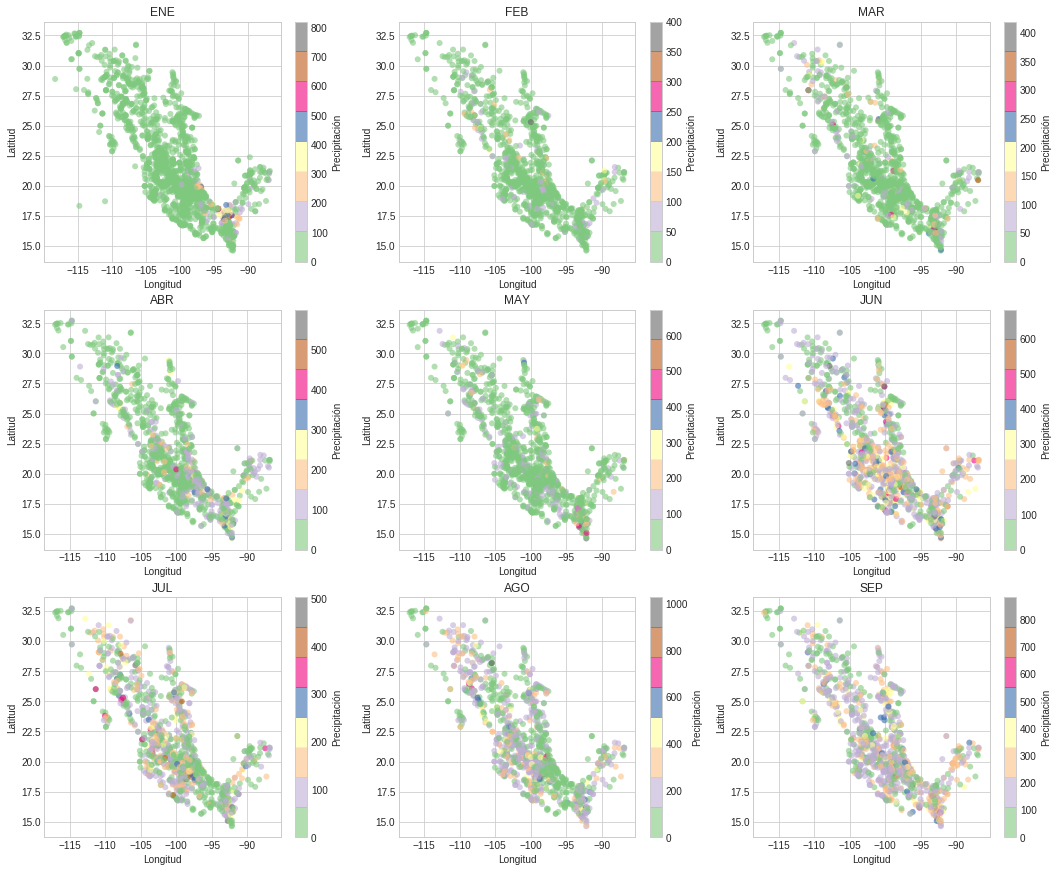

In [25]:
fig = plt.figure(figsize=(18,15))

for i in range(len(meses)):
    plt.subplot(3, 3, i + 1)
    plt.scatter(lluvias_2018['LON'], lluvias_2018['LAT'], label = None, c = lluvias_2018[meses[i]], cmap = 'Accent',
            linewidth = 0, alpha = 0.6)
    plt.axis(aspect = 'equal')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.colorbar(label='Precipitación');
    plt.title(meses[i])
plt.savefig('Mapa1.png')
plt.show()

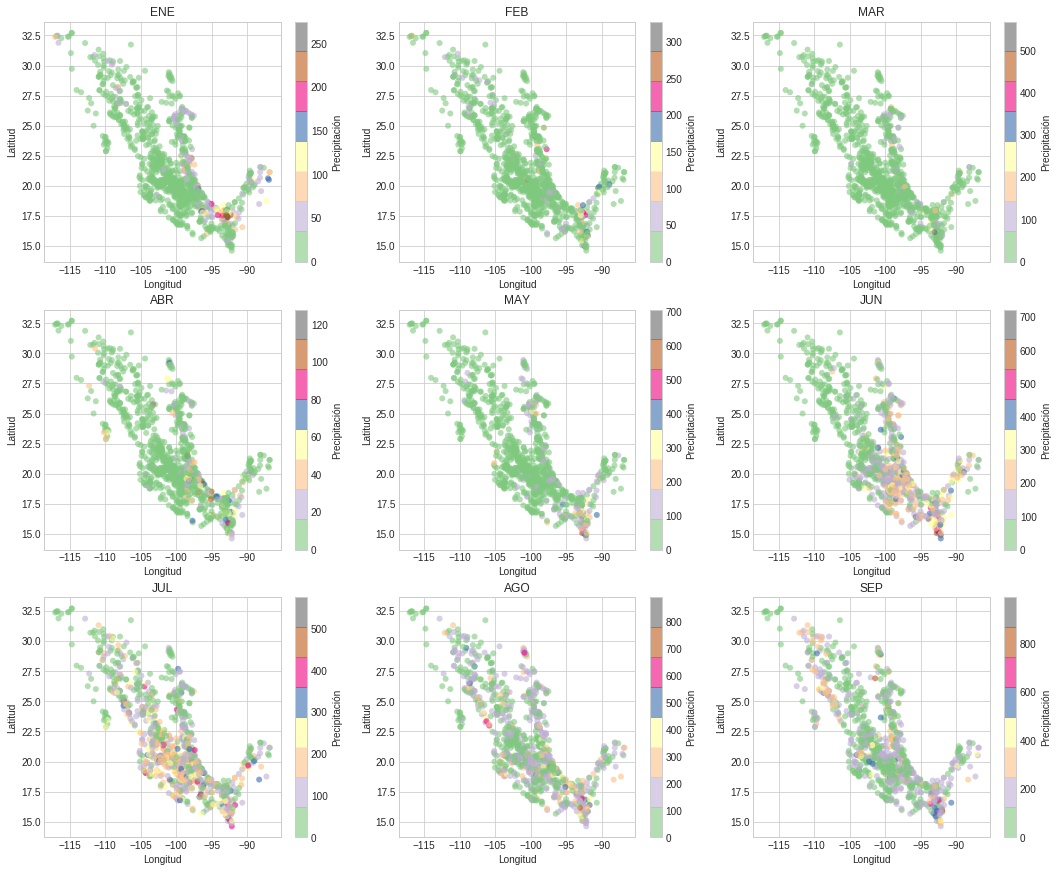

In [26]:
fig = plt.figure(figsize=(18,15))

for i in range(len(meses)):
    plt.subplot(3, 3, i + 1)
    plt.scatter(lluvias_2019['LON'], lluvias_2019['LAT'], label = None, c = lluvias_2019[meses[i]], cmap = 'Accent',
            linewidth = 0, alpha = 0.6)
    plt.axis(aspect = 'equal')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.colorbar(label='Precipitación');
    plt.title(meses[i])
plt.savefig('Mapa2.png')
plt.show()

<strong>Nota.</strong> En el análisis de las precipitaciones hubo lugares en el que la precipitación fue cero por lo que no se consideraron puesto que no se tiene seguridad de si en ese lugar hubo toma de datos. Por tanto, se cambia la elección de la elección como precipitación mínima por año.

In [30]:
print(xm_max.to_latex())

\begin{tabular}{lllrlr}
\toprule
{} &  MES &                                     EDO 2018 &  MÁXIMO 2018 &                                     EDO 2019 &  MÁXIMO 2019 \\
\midrule
0 &  ENE &   Index(['TAB'], dtype='object', name='EDO') &   304.619231 &   Index(['TAB'], dtype='object', name='EDO') &   132.253182 \\
1 &  FEB &   Index(['SIN'], dtype='object', name='EDO') &    39.403922 &   Index(['TAB'], dtype='object', name='EDO') &    62.441818 \\
2 &  MAR &   Index(['SON'], dtype='object', name='EDO') &    51.395000 &    Index(['NL'], dtype='object', name='EDO') &    54.804000 \\
3 &  ABR &   Index(['TAB'], dtype='object', name='EDO') &   108.221739 &  Index(['TLAX'], dtype='object', name='EDO') &    30.590000 \\
4 &  MAY &  Index(['CHIS'], dtype='object', name='EDO') &   119.727103 &  Index(['CHIS'], dtype='object', name='EDO') &   203.600845 \\
5 &  JUN &   Index(['NAY'], dtype='object', name='EDO') &   300.737143 &  Index(['CHIS'], dtype='object', name='EDO') &   272.508451 \\
6 &  